In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Simple Linear Regression 

In [222]:
data = pd.read_csv('https://raw.githubusercontent.com/tanvipenumudy/ML-Stream-Interns-Summer-21/main/Khushi%20Jain/dataset.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [223]:
data.rename(columns={
    'Gender': 'gender',
    'Age Range': 'age',
    'Head Size(cm^3)': 'head_size',
    'Brain Weight(grams)': 'brain_weight'
}, inplace=True)
data.head()

,gender,age,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Data Preprocessing

In [224]:
data.shape

(237, 4)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gender        237 non-null    int64
 1   age           237 non-null    int64
 2   head_size     237 non-null    int64
 3   brain_weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [226]:
data.describe()

,gender,age,head_size,brain_weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [227]:
data.isnull().sum()

gender          0
age             0
head_size       0
brain_weight    0
dtype: int64

In [228]:
X = data['head_size'].values
Y = data['brain_weight'].values

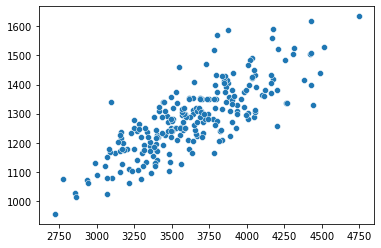

In [229]:
sns.scatterplot(X, Y)
plt.show()

## Plotting a regression line b/w head_size and brain_weight

In [230]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [231]:
x_mean, y_mean

(3633.9915611814345, 1282.873417721519)

In [232]:
n = data.shape[0]
n

237

In [233]:
numerator = 0
denominator = 0

### Find coefficient and intercept value

In [234]:
for i in range(n):
  numerator += ( (X[i]- x_mean) * (Y[i] - y_mean) )
  denominator += (X[i]- x_mean)**2

  coeff = numerator/denominator
  intercept = y_mean - coeff * x_mean 

In [235]:
coeff, intercept

(0.26342933948939945, 325.57342104944223)

In [237]:
y_pred = coeff * X + intercept

### Plot regression line

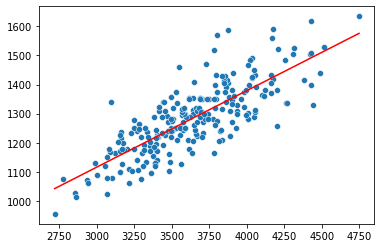

In [238]:
sns.scatterplot(X, Y)
sns.lineplot(X, y_pred, color='r')
plt.show()

### Find RMSE

In [239]:
SS = 0
for i in range(n):
  SS += (Y[i]-y_pred[i])**2

RMSE = np.sqrt(SS/n)
RMSE

72.1206213783709

### Find R-squared value

In [240]:
nume = 0
deno = 0

for i in range(n):
  nume += (y_pred[i]-y_mean)**2
  deno += (Y[i]-y_mean)**2
r2 = nume/deno
r2

0.6393117199570001

## Multi-variate Linear Regression without sklearn

Mathematical equation: https://www.coursera.org/lecture/machine-learning/gradient-descent-for-multiple-variables-Z9DKX

Code: https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905

Broadcasting: https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

In [203]:
data = pd.read_csv('https://raw.githubusercontent.com/tanvipenumudy/ML-Stream-Interns-Summer-21/main/Khushi%20Jain/multi-variate-LR-dataset.txt', names=['size', 'bedroom', 'price'])
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Feature Scaling

In [204]:
for column in data.columns[:2]:
  
  data[column] = (data[column]-data[column].mean()) / data[column].std()

In [205]:
data.head()

,size,bedroom,price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


### Create Matrices

In [206]:
X = data.iloc[:, :2].values
Y = data.iloc[:, 2:].values
# data.iloc[:, 2:] makes (47, 1) 2d 
# data.iloc[:, 2] makes (47, ) 1d

In [207]:
# x-matrix
# y = C*X0 + m1*X1 + m2*X2
# here we are taking X0 = 1
x0_ones = np.ones((data.shape[0], 1))
X = np.concatenate( (X, x0_ones), axis=1 )

In [208]:
X[:4]

array([[ 0.13000987, -0.22367519,  1.        ],
       [-0.50418984, -0.22367519,  1.        ],
       [ 0.50247636, -0.22367519,  1.        ],
       [-0.73572306, -1.53776691,  1.        ]])

In [209]:
# coefficients matrix
theta = np.zeros((1, 3))
theta

array([[0., 0., 0.]])

### Hyperparameters

In [210]:
alpha = 0.01
iterations = 1000

### Cost function

In [211]:
n = X.shape[0]
n

47

In [212]:
theta.T

array([[0.],
       [0.],
       [0.]])

In [213]:
print(X.shape)
print(Y.shape)
print(theta.shape)

(47, 3)
(47, 1)
(1, 3)


In [214]:
def compute_cost(X, Y, theta):
  residual_sq = (( X @ theta.T ) - Y )**2
  sum_residual_sq = np.sum(residual_sq)
  return (sum_residual_sq/(2*n))

### Gradient descent

In [215]:
def gradient_descent(X, Y, theta, iterations, alpha):

  cost = np.zeros(iterations)
  for i in range(iterations):
    theta = theta - (alpha/n) * np.sum( (X* ((X @ theta.T) - Y) ), axis = 0)
    cost[i] = compute_cost(X, Y, theta)
  return (theta, cost)

In [216]:
coeff, cost = gradient_descent(X, Y, theta, iterations, alpha)

In [217]:
coeff

array([[109848.00846026,  -5866.45408497, 340397.96353532]])

In [218]:
cost[999]

2043544218.7812893

In [219]:
print(coeff.shape)
print(X.shape)

(1, 3)
(47, 3)


In [220]:
y_pred = np.sum(coeff * X, axis=1)
y_pred

array([355991.46894881, 286325.89413608, 396906.1716166 , 268601.48908145,
       472132.32096111, 331833.59390769, 277203.02124393, 262412.90913091,
       255916.31782893, 271674.00736991, 325613.45329941, 341616.03287634,
       326411.24472277, 668720.32484049, 240435.07898166, 375374.57816564,
       255331.85578378, 236011.86788244, 418086.2103425 , 476417.30671348,
       309409.52706014, 333843.85279496, 286878.79552348, 328654.41093012,
       602861.93842409, 217213.22071075, 266697.89488328, 414322.56531979,
       369261.10224647, 429665.57882021, 327070.81079928, 218808.80355747,
       339435.98798447, 498778.25224554, 307782.38355567, 263795.16259942,
       236426.54392299, 352152.71989473, 640076.11738466, 356299.48030025,
       302881.37510041, 374513.6654268 , 412280.74577477, 231035.75539581,
       190642.39345768, 313449.62277655, 231450.43143636])

In [221]:
nume = 0
deno = 0

for i in range(n):
  nume += (y_pred[i]-Y.mean())**2
  deno += (Y[i]-Y.mean())**2
r2 = nume/deno
print("R-squared", r2)

R-squared [0.72781013]
